# Regresión Lineal

## Regresión Lineal Simple

La **regresión lineal simple** consiste en el cálculo de una **función lineal** que se ajuste a un conjunto de datos $\{(x_i,y_i)\}$, esto es: $$\hat{y} = \alpha + \beta x$$
donde los parámetros $\alpha$ y $\beta$ optimizan la función en el sentido que minimizan los cuadrados de las desviaciones verticales de la recta ajustada. Así, para cada valor real de $y$, se tiene un valor estimado por esta función $\hat{y}(x)$ con el cual es posible calcular el **error** entre el valor real y el estimado: $$e = y - \hat{y}(x_i)$$.

Este valor estimado $E(y)$ de se acercará al valor real de $y$ en medida de $$y = \alpha + \beta x + \varepsilon $$ donde $\varepsilon$ es una variable aleatoria con distribución normal.

La regresión lineal es un algoritmo de aprendizaje automático *supervisado*.  

### Modelo lineal con datos simulados 

Se va a construir una función $ \hat{y} = \alpha + \beta x$ usando datos simulados.
* Se construye un vector $\textbf{x}$ con 100 valores distribuidos según una distribución normal $N\sim(1.5, 2.5)$
* Con los valores de en $\textbf{x}$ se calculan los valores estimados $\hat{y} = 5 + 1.9x$ y los valores reales $y = 5 + 1.9x + \varepsilon$

In [1]:
import pandas as pd
import numpy as np

In [2]:
# simula datos predictores con distribución N~(1.5,2.5)
x = 1.5 + 2.5 * np.random.randn(100)

In [3]:
# simula datos residuales con distribución N~(0, 0.8)
res = 0 + 0.8 * np.random.randn(100)

In [4]:
# simula datos de la variable de respuesta estimada
y_pred = 5 + 1.2 * x

In [5]:
# simula datos de la variable de respueta real agregando el residuo
y_real = 5 + 1.2 * x + res

In [6]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_real_list = y_real.tolist()

In [7]:
data = pd.DataFrame(
    {
        "x": x_list,
        "y_real": y_real_list,
        "y_pred": y_pred_list
    }
)

In [8]:
data.head()

,x,y_real,y_pred
0,5.340465,12.561304,11.408558
1,3.347939,10.211631,9.017527
2,1.727016,7.396757,7.072419
3,6.725550,12.362164,13.070660
4,5.127430,11.147434,11.152915


In [9]:
import matplotlib.pyplot as plt
% matplotlib inline

Text(0.5,1,'Valores reales vs estimados')

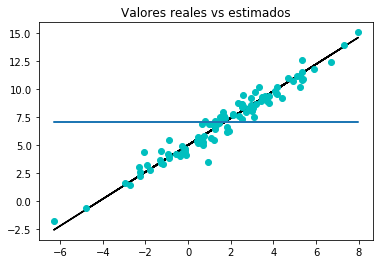

In [10]:
# crea un vector con valores de la media de y_real
y_mean = [np.mean(y_real) for i in range(0, len(x_list))]

# grafica las series de datos
plt.plot(x, y_pred, "k")
plt.plot(x, y_real, "co")
plt.plot(x, y_mean)
plt.title("Valores reales vs estimados")

### Coeficiente de determinación

Para validar la efectividad del ajuste del modelo lineal, se calcula el coeficiente de determinación $R^2$.

Este coeficiente se obtiene a partir de tres tipos de diferencias:
* diferencias de la regresión (SSR): $$SSR = \sum{({\hat{y}_i}-\bar{y})^2}$$
* diferencias del modelo (SSD): $$SSD = \sum{(y_i-\hat{y}_i)^2}$$
* diferencias totales (SST): $$SST = \sum{(y_i-\bar{y})^2}$$

$$ R^2 = \frac{SSR}{SST}$$

$R^2$ toma valores en el intervalo $[0,1]$. Un valor cercano a 1 representa una buena aproximación de los datos estimados a los datos reales. 

In [11]:
data["SSR"] = (data["y_pred"] - np.mean(data["y_real"]))**2
data["SSD"] = (data["y_real"] - data["y_pred"])**2
data["SST"] = (data["y_real"] - np.mean(data["y_real"]))**2

In [12]:
data.head()

,x,y_real,y_pred,SSR,SSD,SST
0,5.340465,12.561304,11.408558,18.947966,1.328824,30.312427
1,3.347939,10.211631,9.017527,3.849032,1.425884,9.960329
2,1.727016,7.396757,7.072419,0.000282,0.105195,0.116366
3,6.725550,12.362164,13.070660,36.180561,0.501966,28.159282
4,5.127430,11.147434,11.152915,16.787733,0.000030,16.742842


In [13]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

In [14]:
(SSR, SSD, SST)

(930.9559253061474, 45.72407835694364, 901.6949801557994)

In [15]:
R2 = SSR/SST
R2

1.0324510458573166

(array([ 1.,  0.,  0.,  6., 18., 31., 21., 14.,  7.,  2.]),
 array([-2.60308564, -2.15778973, -1.71249382, -1.26719792, -0.82190201,
        -0.37660611,  0.0686898 ,  0.5139857 ,  0.95928161,  1.40457751,
         1.84987342]),
 <a list of 10 Patch objects>)

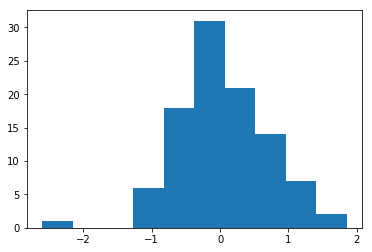

In [16]:
error = data["y_real"] - data["y_pred"]
plt.hist(error)

### Cálculo de la recta de regresión

El valor de los coeficientes $\alpha$ y $\beta$ están dados por el método de los mínimos cuadrados. Sea la suma del cuadrado de las desviaciones que deben minimizarse: $$SCE = \sum{y - \hat{y}(x_i)} = \sum{(y - (\alpha + \beta x_i))^2}$$
Para minizar SCE entonces:
$$\frac{\partial SCE}{\partial \alpha} = 0$$

$$\frac{\partial SCE}{\partial \beta} = 0$$

lo que resulta en:
$$\beta = \frac{\sum(x_i-\bar{x})(y_i-\bar{y})}{\sum(x_i-\bar{x})^2}$$

$$\alpha = \bar{y}-\beta \bar{x}$$

In [17]:
x_mean = np.mean(data["x"])
y_mean = np.mean(data["y_real"])
x_mean, y_mean

(1.7022947378910258, 7.055631894938097)

In [18]:
data.head()

,x,y_real,y_pred,SSR,SSD,SST
0,5.340465,12.561304,11.408558,18.947966,1.328824,30.312427
1,3.347939,10.211631,9.017527,3.849032,1.425884,9.960329
2,1.727016,7.396757,7.072419,0.000282,0.105195,0.116366
3,6.725550,12.362164,13.070660,36.180561,0.501966,28.159282
4,5.127430,11.147434,11.152915,16.787733,0.000030,16.742842


In [19]:
data["beta_n"] = (data["x"] - x_mean) * (data["y_real"] - y_mean)
data["beta_d"] = (data["x"] - x_mean) ** 2

In [20]:
beta = sum(data["beta_n"])/sum(data["beta_d"])
alfa = y_mean - beta*(x_mean)

In [21]:
alfa, beta

(5.095111373881696, 1.1516927576744382)

In [22]:
print("El modelo lineal está dato por la recta: " + "y = " + str(alfa) + " + " + str(beta) + "x")

El modelo lineal está dato por la recta: y = 5.095111373881696 + 1.1516927576744382x


In [23]:
data["y_model"] = alfa + beta * data["x"] 

In [24]:
data.head()

,x,y_real,y_pred,SSR,SSD,SST,beta_n,beta_d,y_model
0,5.340465,12.561304,11.408558,18.947966,1.328824,30.312427,20.030573,13.236283,11.245686
1,3.347939,10.211631,9.017527,3.849032,1.425884,9.960329,5.193652,2.708145,8.950909
2,1.727016,7.396757,7.072419,0.000282,0.105195,0.116366,0.008433,0.000611,7.084103
3,6.725550,12.362164,13.070660,36.180561,0.501966,28.159282,26.656064,25.233092,12.840878
4,5.127430,11.147434,11.152915,16.787733,0.000030,16.742842,14.014973,11.731549,11.000335


In [25]:
SSR = sum((data["y_model"] - y_mean)**2)
SSD = sum((data["y_real"] - data["y_model"])**2)
SST = sum((data["y_real"] - y_mean)**2)

In [26]:
SSR, SSD, SST

(857.4961188629145, 44.198861292884224, 901.6949801557994)

In [27]:
R2 = SSR / SST
R2

0.9509824693875439

Text(0.5,1,'Valores reales vs estimados')

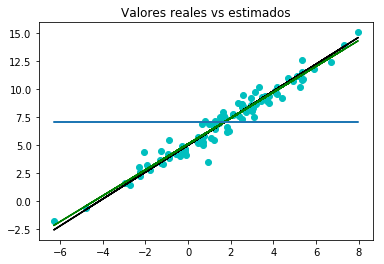

In [28]:
# crea un vector con valores de la media de y_real
y_mean = [np.mean(y_real) for i in range(0, len(x_list))]

# grafica las series de datos
plt.plot(x, y_real, "co")
plt.plot(x, y_pred, "k")
plt.plot(x, data["y_model"], "g")
plt.plot(x, y_mean)
plt.title("Valores reales vs estimados")

### Error estándar de los residuos

Otro coeficiente de significancia del modelo es el **error estandar residual** que es la desviación del término del error (parte de los datos que el modelo no es capaz de explicar). En el caso de la regresión lineal simple: $$ RSE = \sqrt{\frac{\sum (y_i-\hat{y}(x_i))^2}{n-2}} = \sqrt{\frac{SSD}{n-2}}$$ 

In [29]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE

0.6715718790292668

In [30]:
np.mean(data["y_real"])

7.055631894938097

La relación entre el error estándar residual y la media determina el el porcentaje de datos que el modelo no puede estimar correctamente:

In [31]:
RSE / np.mean(data["y_real"]) * 100

9.51823860753097

En resumen, al generar series de valores aleatorios distribuidos de forma normal con media y varianza fijas se simuló una muestra de datos con los cuales se calculó un **modelo lineal** a partir de los parámetros $\alpha$ y $\beta$. Los gráficos nos auxilian para observar la calidad del ajuste del modelo lineal a los datos simulados. El coeficiente de determinación $R^2$ fue calculado para conocer la efectividad del modelo.
 

### Regresión lineal usando el paquete Statsmodel

Es importante conocer la **influencia** de la variable predictora respecto a la variable de salida, lo cual se verifica haciendo una prueba de hipótesis al parámetro $\beta$ estimado. Por medio de una prueba de hipótesis la significancia del valor estimado $\beta$ está dado por el **p-valor**.

Si el *p-valor* es mayor que cierto nivel de umbral $\xi$, se rechaza la hipótesis que el parámetro estimado $\beta$  es un buen estimador, es decir, que la variable predictora tenga significancia sobre el valor de la variable de salida.

Adicional al *p-valor* también se considera el estadístico $t$ para verificar la significancia del modelo. 

In [32]:
from IPython.display import IFrame
IFrame('https://www.statsmodels.org/stable/index.html', width='100%', height=350)

# http://nbviewer.jupyter.org/github/ipython/ipython/blob/2.x/examples/Notebook/Display%20System.ipynb#LaTeX

In [33]:
mainpath = "/home/oscar/Documentos/udemy/machine-learning-joanby/python-ml-course-master/datasets"
filename = "/ads/Advertising.csv"
data = pd.read_csv(mainpath + filename)

In [34]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [35]:
import statsmodels.formula.api as amf

In [36]:
lm = amf.ols(formula = "Sales~TV", data = data).fit()

In [37]:
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

El modelo lineal predictivo sería:$$sales = 7.032594 + 0.047537 \cdot TV$$

In [38]:
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

Los $p$-valores de los parámetros son muy pequeños por lo que dichos parámetros son significativos para el modelo. 

In [39]:
# R²
lm.rsquared

0.611875050850071

In [40]:
# R² ajustado
lm.rsquared_adj

0.6099148238341623

Un conjunto de parámetros y estadísticos del modelo se puede obtener con la función `sumary()` 

In [41]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 29 Aug 2018   Prob (F-statistic):           1.47e-42
Time:                        17:54:16   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Es posible hacer la estimación de valores $\hat{y}(x)$ utilizando la función `predict()` 

In [42]:
# equivalente a lm.predict(pd.DataFrame(data["TV"]))

sales_pred = lm.predict(data["TV"])
sales_pred

0      17.970775
1       9.147974
2       7.850224
3      14.234395
4      15.627218
5       7.446162
6       9.765950
7      12.746498
8       7.441409
9      16.530414
10     10.174765
11     17.238710
12      8.163966
13     11.667416
14     16.734822
15     16.321253
16     10.255578
17     20.409404
18     10.322129
19     14.034741
20     17.414596
21     18.317792
22      7.660077
23     17.885209
24      9.994126
25     19.529976
26     13.825579
27     18.446141
28     18.859710
29     10.388680
         ...    
170     9.409426
171    14.852371
172     7.964312
173    15.037764
174    17.604742
175    20.195489
176    18.840695
177    15.123330
178    20.185982
179    14.904661
180    14.476831
181    17.419349
182     9.704153
183    20.704131
184    19.097393
185    16.777605
186    13.663955
187    16.116846
188    20.628073
189     7.921529
190     8.910291
191    10.621610
192     7.850224
193    14.961705
194    14.148829
195     8.848493
196    11.510545
197    15.4465

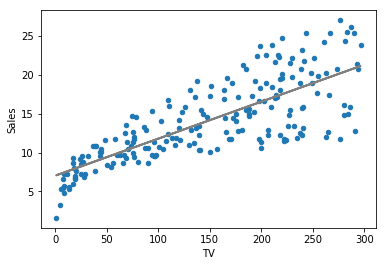

In [43]:
data.plot(kind = "scatter", x ="TV", y = "Sales")
plt.plot(data["TV"], sales_pred, c = "gray", linewidth = 2)

Se calcula el error estándard residual (RSE):

In [44]:
data_sre = (data["Sales"]- sales_pred)**2

In [45]:
SSD = sum(data_sre)
SSD

2102.530583131351

In [46]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE

3.258656368650462

In [47]:
sales_med = np.mean(data["Sales"])
sales_med

14.022500000000003

In [48]:
error = RSE/sales_med
error

0.23238768897489473

El modelo no explica o aproxima con certeza el 23% de los datos

plt.hist(data["Sales"]- sales_pred)

## Regresión lineal multivariable

La **regresión lineal multivariable** consiste en el cálculo de una función: $$\hat{y}:= \alpha + \sum_{i=1}^{k}\beta_i x_i$$ donde los parámetros $\alpha$ y ${\beta_i}^{'}s$ optimizan la función en el sentido que minimizan el error cuadrático entre los valores reales y los valores estimados.

Un estadístico que verifica la confiabilidad estadística de los las ${\beta_i}^{'}s$ es: $$F = \frac{SSR}{k} \div   \frac{SSD}{n-k-1}$$ 

Añadimos otro coeficiente de significancia para validar el modelo: el **error estandar residual** que es la desviación del término del error (parte de los datos que el modelo no es capaz de explicar).

En el caso de la regresión lineal múltiple: $$ RSE = \sqrt{\frac{\sum (y_i-\hat{y}(x_i))^2}{n-k-1}}= \sqrt{\frac{SSD}{n-k-1}}$$

El modelo lineal tendrá que estimar $y$ en función de dos o más variables predictoras. El cálculo de los coeficientes ${\beta_i}^{'}s$ tendrá asociado un coeficiente de significancia $p$, que a menor valor ofrece mayor significancia del parámetro $\beta_i$, así la variable predictora $x_i$ tendrá influencia sobre el modelo.   

Así, retomando la campaña de mercadotecnia y ventas de la sección anterior, podemos mencionar que la complejidad del análisis se incrementa ya que si se tienen $k$ variables predictoras existen $2^k-1$ posibles modelos lineales:
1. Sales-TV
2. Sales-Newspaper
3. Sales-Radio
4. Sales-TV-Newspaper
5. Sales-TV-Radio
6. Sales-Newpaper-Radio
7. Sales-TV-Newspaer-Radio

Una guía de filtrado sobre el modelo a evaluar sugiere utilizar alguno de los siguientes pasos:
1. Evaluar un modelo lineal que utilice todas las variables predictoras y utilizar aquellas variables con los p-valores más pequeños, eliminando las variables cuyo p-valor sea mayor a cierto umbral $\xi$.
2. Utilizar una nueva variable predictora de tal forma que eleve el valor $R^2$.
3. Evaluar un modelo constructivo: iniciar con una variable e ir aumentando variables al modelo. Aquella variable que tenga el menor valor de RSE se irá añadiendo al modelo y/o aquella variable que tenga el mayor valor de $R^2$ y el *p-valor* lo suficientemente menor a $\xi$ también se agregará al modelo.
4. Evaluar un model destructivo: iniciar con todoas las variables e ir eliminando variables al modelo dependiendo de los valores $R^2$, *p-valor* y/o el resultado del RSE. 

### Ejercicio:
Agregar al modelo las dos variables restantes y evaluar sus coeficientes de significancia.
Agregar todas las variables al modelo y verificar si la calidad del modelo aumenta.

Añadimos **Newspaper** al modelo predictivo:

In [51]:
lm2 = amf.ols(formula = "Sales~TV+Newspaper", data = data).fit()

In [52]:
lm2.params

Intercept    5.774948
TV           0.046901
Newspaper    0.044219
dtype: float64

In [53]:
lm2.pvalues

Intercept    3.145860e-22
TV           5.507584e-44
Newspaper    2.217084e-05
dtype: float64

El resultado sugiere que los parámetros son significativos: $sales = 5.77 + 0.046 \cdot TV + 0.044\cdot Newspaper$

In [54]:
lm2.rsquared

0.6458354938293271

In [55]:
lm2.rsquared_adj

0.6422399150864777

Hacemos algunas predicciones usando el modelo con dos variables: TV y Newspaper:

In [56]:
sales_pred = lm2.predict(data[['TV', 'Newspaper']])

In [57]:
sales_pred

0      19.626901
1       9.856348
2       9.646055
3      15.467318
4      16.837102
5       9.499445
6       9.510924
7      11.925419
8       6.222518
9      16.083262
10      9.945228
11     16.021516
12      9.805257
13     10.666196
14     17.381579
15     17.278653
16     13.995865
17     21.440393
18      9.829727
19     13.528088
20     18.379490
21     17.948453
22      8.587327
23     17.641044
24      9.506109
25     18.967556
26     13.034296
27     18.048554
28     18.456595
29     10.890326
         ...    
170     8.933646
171    15.586198
172     7.445942
173    14.239121
174    16.785052
175    20.610266
176    18.322864
177    15.314058
178    19.800514
179    14.320051
180    13.486699
181    17.234475
182     9.724113
183    22.438692
184    19.005059
185    16.256398
186    13.493904
187    15.542563
188    19.352307
189     7.686735
190     7.884019
191     9.581306
192     7.978983
193    13.757260
194    13.061376
195     8.176802
196    10.551220
197    14.3594

In [59]:
SSD = sum((data['Sales'] - sales_pred)**2)
SSD

1918.561811896828

In [61]:
RSE = np.sqrt(SSD/(len(data)-2-1))
RSE

3.120719860252886

In [64]:
error = RSE / sales_med
error

0.22255089037282122

Este modelo no estima o aproxima con exactitud 22% de los datos.

In [65]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     179.6
Date:                Wed, 29 Aug 2018   Prob (F-statistic):           3.95e-45
Time:                        19:17:21   Log-Likelihood:                -509.89
No. Observations:                 200   AIC:                             1026.
Df Residuals:                     197   BIC:                             1036.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7749      0.525     10.993      0.000       4.739       6.811
TV             0.0469      0.003     18.173      0.000       0.042       0.052
Newspaper      0.0442      0.010      4.346      0.000       0.024       0.064
==============================================================================
Omnibus:                        0.658   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.720   Jarque-Bera (JB):                0.415
Skew:                          -0.093   Prob(JB):                        0.813
Kurtosis:                       3.122   Cond. No.                         410.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Añadimos **Radio** al modelo predictivo:

In [69]:
lm3 = amf.ols(formula = "Sales~TV+Radio", data = data).fit()

In [70]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Wed, 29 Aug 2018   Prob (F-statistic):           4.83e-98
Time:                        19:23:03   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Hacemos algunas predicciones usando el modelo con las variables: TV y Radio:

In [72]:
sales_pred = lm3.predict(data[['TV', 'Radio']])
sales_pred

0      20.555465
1      12.345362
2      12.337018
3      17.617116
4      13.223908
5      12.512084
6      11.718212
7      12.105516
8       3.709379
9      12.551697
10      7.035860
11     17.256520
12     10.608662
13      8.810951
14     18.444668
15     20.828915
16     12.903865
17     23.241076
18      9.941215
19     14.153846
20     18.121392
21     14.742064
22      6.514172
23     16.544027
24      8.140352
25     15.608021
26     14.967694
27     17.046335
28     19.399541
29      9.159297
         ...    
170     7.389574
171    14.376846
172     7.596578
173    11.960970
174    13.736151
175    24.783526
176    19.964022
177    12.174924
178    16.013844
179    12.378040
180    10.575089
181    13.933696
182     6.564088
183    24.163936
184    18.537949
185    20.779377
186     9.698684
187    17.060279
188    18.620097
189     6.051445
190    12.454978
191     8.405926
192     4.478859
193    18.448761
194    16.463190
195     5.364512
196     8.152375
197    12.7680

In [73]:
SSD = sum((data['Sales'] - sales_pred)**2)
SSD

556.9139800676185

In [74]:
RSE = np.sqrt(SSD/(len(data)-2-1))
RSE

1.6813609125080011

In [76]:
RSE/sales_med

0.1199045043685506

Este modelo no estima o aproxima con exactitud 12% de los datos

Con esta información podemos concluir hasta el momento que hay una mejor ajuste del modelo lineal con las variables *TV* y *Radio* más aún que por separadas las cada una de las tres características. Ahora bien, ¿podría mejorarse el ajuste considerando las tres variables?

In [78]:
lm4 = amf.ols(formula = "Sales~TV+Radio+Newspaper", data = data).fit()

In [79]:
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 29 Aug 2018   Prob (F-statistic):           1.58e-96
Time:                        20:42:36   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Para este caso podemos observar que el *p-valor* es cercano a 1, y valor del parámetro $\beta$ asociado a esta variable predictora es casi 0. Por tanto, es inmediato suponer que esta variable no aporta significatividad al modelo.

In [82]:
sales_pred = lm4.predict(data[['TV', 'Radio', 'Newspaper']])
sales_pred

0      20.523974
1      12.337855
2      12.307671
3      17.597830
4      13.188672
5      12.478348
6      11.729760
7      12.122953
8       3.727341
9      12.550849
10      7.032299
11     17.285129
12     10.577121
13      8.826300
14     18.434366
15     20.819300
16     12.823657
17     23.224957
18      9.951682
19     14.166073
20     18.100767
21     14.740538
22      6.489150
23     16.545933
24      8.146519
25     15.610039
26     14.989514
27     17.051673
28     19.410538
29      9.144024
         ...    
170     7.394980
171    14.358274
172     7.607692
173    11.970939
174    13.744357
175    24.786870
176    19.979373
177    12.162046
178    16.010997
179    12.384555
180    10.587200
181    13.928099
182     6.554670
183    24.133100
184    18.538521
185    20.803011
186     9.691373
187    17.076442
188    18.644306
189     6.051624
190    12.489159
191     8.424019
192     4.466230
193    18.486958
194    16.495300
195     5.370342
196     8.165312
197    12.7859

In [87]:
SSD = sum((data['Sales'] - sales_pred)**2)
SSD

556.8252629021869

In [86]:
RSE = np.sqrt(SSD/(len(data)-3-1)) # se modifica k = 3
RSE

1.6855103734147436

In [88]:
RSE/sales_med

0.12020041885646235

Este modelo no estima o aproxima con exactitud 12% de los datos

**Conlusiones:** Por mencionar lo menos, el modelo que considera las tres variables predictoras: TV, Radio, y Newspaper, es parecido al modelo que considera TV y Radio solamente. No existe, diferencia considerable entre los dos modelos, además que el parametro para Newspapers no aporta casi nada al modelo.

¿Cuál es la razón de la falta de significancia de la variable predictora Newspaper?

## Muticolinealidad

La multicolineadad es la razón por la cual el modelo no se benefició de añadir otra variable predictora al modelo. Este concepto alude a la correlación entre variables predictoras del modelo, es un problema muy común en el análisis de regresión.

Resultado del análisis de correlación previo, notamos que existe a correlación significativa entre la variable Radio y Newspaper, esto aumenta la variabilidad del coficiente $\beta$ que se está estimando para la variable predictora. Esto representa un problema pues una variable interactúa de manera negativa con la otra.

Para identificar con precisión este problema se utiliza el estadístico $t$ y la matriz de correlación. Dado el caso de alta correlación entre variables predictoras, es necesario identificar el efecto que esto provoca al modelo, con la finalidad de deseachar del modelo una o más de variables significativamente correlacionadas, esto se hace echando mano de la técnica del **factor de inflación de la varianza** conocido como **VIF**.

Esta prueba detecta la multicolinealidad entre variables a través de un estadístico: el método cuantifica la aparición de una variabilidad en un coeficiente estimado de una variable predictora debida a la alta correlación entre dos o más variables predictoras. El *VIF* deberá ser calculado para cada una de las variables predictoras y si el valor es muy alto para una variable en particular, entonces deberá ser eliminada del modelo.

El factor de inflación de varianza puede interpretarse según los siguientes valores:
   * Si $VIF = 1$: Las variables no están correlacionadas.
   * Si $VIF < 5$: Las variables tienen una correlación moderada y pueden ser parte del modelo.
   * Si $VIF > 5$: Las variables están altamente correlacionadas y deben ser retiradas del modelo.

Para nuestro ejemplo vamos a calcular el valor del VIF para cada caso en el que se relacione un par de variables contra otra individual. Así, compararemos:
* TV ~ Radio + Newspaper
* Radio ~ TV + Newspaper
* Newspaper ~ Radio + TV

In [92]:
# TV ~ Radio + Newspaper
lm_tv = amf.ols(formula = "TV ~ Radio + Newspaper", data = data).fit()
r_squared_tv = lm_tv.rsquared
VIF = 1 / (1 - r_squared_tv)
VIF

1.0046107849396502

In [93]:
# Radio ~ TV + Newspaper
lm_ra = amf.ols(formula = "Radio ~ TV + Newspaper", data = data).fit()
r_squared_ra = lm_ra.rsquared
VIF = 1 / (1 - r_squared_ra)
VIF

1.1449519171055353

In [95]:
# Newspaper ~ Radio + TV
lm_new = amf.ols(formula = "Newspaper ~ Radio + TV", data = data).fit()
r_squared_new = lm_new.rsquared
VIF = 1 / (1 - r_squared_new)
VIF

1.1451873787239288

El resultado del cálculo de los valores VIF nos ayuda a elegir como variable principal para la estimacion a la 'TV', mientras que la decisión de elegir entre 'Radio' y 'Newspaper' es dudosa pues sus valores son casi iguales, en este caso se verifica aquella variable que ofrece mejores resultados en los estadísticos generales al construir el modelo. Así pues, el mejor modelo final es: **lm3** con Sales ~ TV + Radio.